In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math
import scipy.stats as st
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import numpy as np 
import copy
n=5
nn=5
divide_number=1000;
object_number=1.0
batch_size=32
width=0.0001
width1=0.0001

In [2]:
def distribution1(i):
    x=0;
    #x=np.random.uniform(0, 1, size=1);
    #R=np.random.randint(2);
    if (i==0):
        x=np.random.normal(0.3, 0.1, size=1);
    elif(i==1):
        x=np.random.normal(0.3, 0.1, size=1);
    elif(i==2):
        x=np.random.normal(0.3, 0.1, size=1);
    elif(i==3):
        x=np.random.normal(0.3, 0.1, size=1);
    else:
        x=np.random.normal(0.3, 0.1, size=1);
    if(x<=0):
        x=0;
    return x;

def distribution():
    while(True):
        list_temp=np.random.rand(nn);
        for ii in range(len(list_temp)):
            list_temp[ii]=distribution1(ii);
        if(list_temp[0]>list_temp[3] and list_temp[1]>list_temp[4]):
            break;
    list_temp=np.array(list_temp)
    #list_temp=sorted(list_temp,reverse=1);
    return list_temp;
print(distribution())

[0.32137732 0.30703164 0.3180612  0.15679088 0.14700803]


In [3]:
possible = np.zeros((n,divide_number+1), dtype=np.double)
for j in range(0,n):
    for i in range(100000):#100000
        x=distribution1(j%5)*divide_number
        temp=int(x)
        #print(o,temp)
        if(temp>divide_number):
            temp=divide_number
        possible[j][temp]+=1/100000;

In [4]:
P = np.zeros((n,divide_number+1), dtype=np.double)
for j in range(0,n):
    P[j][0]=possible[j][0]
    for i in range(1,divide_number+1):
        P[j][i]=P[j][i-1]+possible[j][i];
print(P)

[[0.0015  0.00155 0.00163 ... 1.      1.      1.     ]
 [0.00143 0.00153 0.00159 ... 1.      1.      1.     ]
 [0.00136 0.00146 0.0015  ... 1.      1.      1.     ]
 [0.00135 0.00139 0.00142 ... 1.      1.      1.     ]
 [0.00138 0.00141 0.00147 ... 1.      1.      1.     ]]


In [5]:
dp = np.zeros(((nn+2), (nn+2), divide_number+1), dtype=np.double)
record_dp = np.zeros(((nn+2), (nn+2), divide_number+1), dtype=np.double)
for yes in range(0,nn+1):
    for i in range(0,divide_number+1):
        dp[1][yes][i]=(1.0-P[nn-1][i])*(0.0)+P[nn-1][i]*(yes+1.0);
        record_dp[1][yes][i]=i;

In [6]:
for i in range(2,nn+1):
    for yes in range(0,nn+1):
        for j in range(divide_number+1):
            min_num=99999;
            for o in range(0,j+1):
                if( min_num>(1.0-P[nn-i][o])*dp[i-1][yes+1][j-o]+P[nn-i][o]*(n)):
                    record_dp[i][yes][j]=o;
                    min_num=(1.0-P[nn-i][o])*dp[i-1][yes+1][j-o]+P[nn-i][o]*(n)
                #min_num=min(min_num,(1.0-P[o])*dp[i-1][yes+1][j-o]+
                #            P[o]*(dp[i-1][yes][j]+1));
                
                #print(i,yes,j,o,(divide_number-o)/divide_number*dp[i-1][yes+1][j-o]+
                #            (o)/divide_number*(dp[i-1][yes][j]+1));
            dp[i][yes][j]=min_num;
        dp[i][yes][0]=0;
        record_dp[i][yes][0]=0

In [7]:
print(dp[nn][0][divide_number]);
print(record_dp[nn][0][divide_number]);
print(temp)


2.9137684144870253
202.0
101


In [8]:
def plan_dp(temp):
    #print(temp)
    remain=divide_number
    yes=0;
    ans =0;
    o_list=[];
    remain_list=[];
    for i in range(nn,0,-1):
        o=record_dp[i][yes][remain]
        #print(o,remain)
        o_list.append(o)
        remain_list.append(remain);
        if(o<temp[nn-i]):
            remain-=int(o);
            
            yes+=1;
        elif (remain>0):
            ans+=1;
            while(len(o_list)<nn):
                o_list.append(100);
            return nn,o_list;
    if(remain<=0):
        return ans,o_list;
    else:
        return nn,o_list;
    

In [9]:
ans_list=[];
for i in range(10000):
    temp=distribution()*divide_number   
    ans_list.append(plan_dp(temp)[0]);
    #print(plan_dp(temp)[0])
print(sum(ans_list)/len(ans_list))

2.922


In [10]:
#Cost Sharing
def cost_sharing(test):
    kk=100;
    total_delay1=0;
    for k in range(nn,0,-1):
        count=0;
        delay=0;
        for item in test:
            if(item>=1.0/k):
                count+=1;
            else:
                delay+=1;
        if(count>=k):
            total_delay1+=delay;
            break;
        if(k<=1):
            #print(test);
            total_delay1+=nn;
    return total_delay1;

def cost_sharing_label(test):
    kk=100;
    total_delay1=0;
    temp=[]
    for item in test:
        if(item!=-1):
            temp.append(item);
    for k in range(nn,0,-1):
        count=0;
        delay=0;
        for item in test:
            if(item>=1.0/k):
                count+=1;
            else:
                delay+=1;
        if(count>=k-1):
            return 1.0/k
            break;


total_delay_cost=0;
test_number_cost=10000
for i in range(test_number_cost):
    test=distribution();
    kk=100;
    for k in range(nn,0,-1):
        count=0;
        delay=0;
        for item in test:
            if(item>=1.0/k):
                count+=1;
            else:
                delay+=1;
        if(count>=k):
            total_delay_cost+=delay;
            break;
        if(k<=1):
            #print(test);
            total_delay_cost+=nn;
            

print(total_delay_cost/test_number_cost);
    

2.0556


In [11]:
#print(trainingdata)

import tensorflow as tf
#导入TensorFlow工具包并简称为tf
 
from numpy.random import RandomState
#导入numpy工具包，生成模拟数据集
keep_prob=1
tensor_number=200
w1 = tf.Variable(tf.truncated_normal([n,tensor_number],stddev=0.1))
w2 = tf.Variable(tf.truncated_normal([tensor_number,tensor_number],stddev=0.1))
w3 = tf.Variable(tf.truncated_normal([tensor_number,tensor_number],stddev=0.1))
w4 = tf.Variable(tf.truncated_normal([tensor_number,tensor_number],stddev=0.1))
w5 = tf.Variable(tf.truncated_normal([tensor_number,tensor_number],stddev=0.1))
w6 = tf.Variable(tf.truncated_normal([tensor_number,n],stddev=0.1))


biases1 = tf.Variable(tf.zeros([1,tensor_number])+0.01)
biases2 = tf.Variable(tf.zeros([1,tensor_number])+0.01)
biases3 = tf.Variable(tf.zeros([1,tensor_number])+0.01)
biases4 = tf.Variable(tf.zeros([1,tensor_number])+0.01)
biases5 = tf.Variable(tf.zeros([1,tensor_number])+0.01)
biases6 = tf.Variable(tf.zeros([1,n])+0.01)




lr1 = tf.Variable(0.00000001,dtype=tf.float32)
lr2 = tf.Variable(0.0000001,dtype=tf.float32)
#分别定义一二层和二三层之间的网络参数，标准差为1，随机产生的数保持一致

with tf.name_scope('input'):
    x = tf.placeholder(tf.float32,shape=(None,n),name='x-input1')
    xx = tf.placeholder(tf.float32,shape=(None,n),name='x-input2')
    y = tf.placeholder(tf.float32,shape=(None,n),name='y-input1')

    

#定义神经网络前向传播过程


Instructions for updating:
Colocations handled automatically by placer.


In [12]:
#输入为两个维度，即两个特征，输出为一个标签,声明数据类型float32，None即一个batch大小
#y_是真实的标签

xor0=tf.sigmoid((1e3-x) / 0.00001)

x1_1 = tf.nn.dropout(tf.nn.relu(tf.matmul(xor0,w1))+biases1,keep_prob)
x1_2 = tf.nn.dropout(tf.nn.relu(tf.matmul(x1_1,w2))+biases2,keep_prob)
x1_3 = tf.nn.dropout(tf.nn.relu(tf.matmul(x1_2,w3))+biases3,keep_prob)
x1_4 = tf.nn.dropout(tf.nn.relu(tf.matmul(x1_3,w4))+biases4,keep_prob)
x1_5 = tf.nn.dropout(tf.nn.relu(tf.matmul(x1_4,w5))+biases5,keep_prob)
#y1_1  = tf.nn.l2_normalize(tf.nn.dropout(tf.nn.relu(tf.matmul(x1_5,w61)+biases61),keep_prob))
y1_1 = tf.nn.softmax((tf.nn.relu(tf.matmul(x1_5,w6))+biases6))
xor1 = tf.sigmoid((x+0.001-y1_1) / width)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:


x0_1 = tf.nn.dropout(tf.nn.relu(tf.matmul(xx,w1))+biases1,keep_prob)
x0_2 = tf.nn.dropout(tf.nn.relu(tf.matmul(x0_1,w2))+biases2,keep_prob)
x0_3 = tf.nn.dropout(tf.nn.relu(tf.matmul(x0_2,w3))+biases3,keep_prob)
x0_4 = tf.nn.dropout(tf.nn.relu(tf.matmul(x0_3,w4))+biases4,keep_prob)
x0_5 = tf.nn.dropout(tf.nn.relu(tf.matmul(x0_4,w5))+biases5,keep_prob)
#y1_1  = tf.nn.l2_normalize(tf.nn.dropout(tf.nn.relu(tf.matmul(x1_5,w61)+biases61),keep_prob))
y0_1 = tf.nn.softmax((tf.nn.relu(tf.matmul(x0_5,w6))+biases6))


In [14]:
offer= y1_1 * xor1

In [15]:
possible=1.0-offer
delay = tf.reduce_sum(offer,reduction_indices=1)

In [16]:

output_payment = tf.reduce_sum(offer,reduction_indices=1)
delta = tf.sigmoid((output_payment+0.001-1.0) / width1)
tf_delay = delta * tf.reduce_sum((1.0-xor1),reduction_indices=1) + (1.0 - delta) * n;


In [17]:
#定义损失函数和反向传播算法

loss= 1.0*(tf.reduce_sum(tf_delay))
#loss= tf.reduce_sum(x5_1)
loss_dp= 1.0*(tf.reduce_sum(tf.square(y0_1-y)))

train_step1=tf.train.AdamOptimizer(lr1).minimize(loss)
train_step2=tf.train.GradientDescentOptimizer(lr2).minimize(loss)
train_step3=tf.train.AdadeltaOptimizer(lr1).minimize(loss)
train_step4=tf.train.AdamOptimizer(lr1).minimize(loss_dp)
#train_step4=tf.train.AdagradDAOptimizer(lr2).minimize(loss)
print(loss)

Instructions for updating:
Use tf.cast instead.
Tensor("mul_3:0", shape=(), dtype=float32)


In [18]:
saver = tf.train.Saver()
#创建会话来运行TensorFlow程序
sess = tf.Session()

init_op = tf.global_variables_initializer()
sess.run(init_op)
writer=tf.summary.FileWriter('logs/',sess.graph)

In [19]:

def run_appen(list_x):
    x1=list_x[0];
    x2=list_x[1];
    x3=list_x[2];
    x4=list_x[3];
    x5=list_x[4];
    
    ans,S=plan_dp([x1*divide_number,x2*divide_number,x3*divide_number,
                  x4*divide_number,x5*divide_number]);
    #print(S[0]/divide_number)
    #print(S)
    SS=copy.deepcopy(S);
    if(S[0]/divide_number>=x1):
        SS[0]=1;
    else:
        SS[0]=0;
    if(S[1]/divide_number>=x2):
        SS[1]=1;
    else:
        SS[1]=0;
    if(S[2]/divide_number>=x3):
        SS[2]=1;
    else:
        SS[2]=0;
    if(S[3]/divide_number>=x4):
        SS[3]=1;
    else:
        SS[3]=0;
    if(S[4]/divide_number>=x5):
        SS[4]=1;
    else:
        SS[4]=0;
    trainingdata1.append(SS)
    trainingdata.append(list_x)
    #traininglabel1.append([cost_sharing_label(test)])
    traininglabel.append([S[0]/divide_number,
                          S[1]/divide_number,S[2]/divide_number,S[3]/divide_number,S[4]/divide_number])
def readdata():
    for i in range(50000):#50000):
        list_x=distribution();
        newX.append(list_x)
    for i in range(len(newX)):
        run_appen(newX[i]);
        
                            
newX=[];
trainingdata1=[];
trainingdata=[];
traininglabel=[];
def produce_training_data():
    newX=[];
    trainingdata=[];
    S=1.0
    readdata();

produce_training_data();
np.set_printoptions(precision=4, suppress=True)

In [20]:

dataset_size=len(trainingdata)
j1=1
j2=2
print(trainingdata[j1:j2])
print(sess.run(loss,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )
print(sess.run(x,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )
print(sess.run(xor1,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )
print(sess.run(offer,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )


[array([0.277 , 0.3442, 0.195 , 0.2056, 0.3007])]
5.0
[[0.277  0.3442 0.195  0.2056 0.3007]]
[[1. 1. 0. 1. 1.]]
[[0.1922 0.2012 0.     0.1922 0.2149]]


In [21]:
print(sess.run(y1_1,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )


print(sess.run(xor1,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )
print(sess.run(offer,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )

[[0.1922 0.2012 0.1994 0.1922 0.2149]]
[[1. 1. 0. 1. 1.]]
[[0.1922 0.2012 0.     0.1922 0.2149]]


In [22]:
save_path = saver.restore(sess, "Tensorflow-5NN-2/1.ckpt")
STEPS = 10001
#设置训练的轮数
flag=0;
training=1;
for i in range(STEPS):

    	#通过选取的样本训练神经网络并更新参数
    if i%500 == 0:
        sess.run(tf.assign(lr1,0.000001*(0.99**(i/1000))))
        sess.run(tf.assign(lr2,0.000001*(0.99**(i/1000))))
        loss_value=0;
        if i%500 == 0:
            for ii in range(10,30):
                #produce_training_data();
                j1=(ii-1)*batch_size
                j2=ii*batch_size
                loss_value += sess.run(loss,feed_dict={
                x:trainingdata[j1:j2]
                 })
            print("After %d training step(s),loss on data is %g" % (i,loss_value/(j2-j1)))
    if i%10000 == -100:
        if((i/100)%3==0):
            flag=0
        elif((i/100)%3==1):
            flag=1
        else:
            flag=1#flag=2

    randomi = random.randint(0,200000);
    start = (randomi) % dataset_size
    end = min(start+batch_size,dataset_size)
    if(flag==0):
        #sess.run(train_step4,feed_dict={x:trainingdata[j1:j2],xx:trainingdata1[j1:j2],y:traininglabel[j1:j2]})                                                                                                                
        sess.run(train_step1,feed_dict={x:trainingdata[j1:j2]})
    elif(flag==1):
        sess.run(train_step2,feed_dict={
                x:trainingdata[j1:j2]
        })
    else:
        sess.run(train_step3,feed_dict={
                x:trainingdata[j1:j2]
        })

    

save_path = saver.save(sess, "Tensorflow-5NN-2/2.ckpt")

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from Tensorflow-5NN-2/1.ckpt
After 0 training step(s),loss on data is 57.5019
After 500 training step(s),loss on data is 57.5019
After 1000 training step(s),loss on data is 57.5019
After 1500 training step(s),loss on data is 57.5019
After 2000 training step(s),loss on data is 57.5019
After 2500 training step(s),loss on data is 57.5019
After 3000 training step(s),loss on data is 57.5019
After 3500 training step(s),loss on data is 57.5019
After 4000 training step(s),loss on data is 57.5019
After 4500 training step(s),loss on data is 57.5019
After 5000 training step(s),loss on data is 57.5019
After 5500 training step(s),loss on data is 57.5019
After 6000 training step(s),loss on data is 57.5019
After 6500 training step(s),loss on data is 57.5019
After 7000 training step(s),loss on data is 57.5019
After 7500 training step(s),loss on data is 57.5019
After 8000 training

In [23]:
fig = plt.figure()
batch_size = 1

<Figure size 432x288 with 0 Axes>

In [24]:
global list_payment
list_payment=[];
def judgement(list_x):
    delay=sess.run(tf_delay,feed_dict={x:[list_x]})
    ans = sess.run(output_payment,feed_dict={x:[list_x]})
    #print(delay,ans)
    list_payment.append(ans);
    return delay
def judgement_detail(list_x):
    global list_payment
    offerxor1= sess.run(xor1,feed_dict={x:[list_x]})
    #offerxor2= sess.run(xor2,feed_dict={x:[list_x]})
    #offerxor3= sess.run(xor3,feed_dict={x:[list_x]})
    #offerxor4= sess.run(xor4,feed_dict={x:[list_x]})
    #offerxor5= sess.run(xor5,feed_dict={x:[list_x]})
    Y1= sess.run(y1_1,feed_dict={x:[list_x]})
    #Y2= sess.run(y2_1,feed_dict={x:[list_x]})
    #Y3= sess.run(y3_1,feed_dict={x:[list_x]})
    #Y4= sess.run(y4_1,feed_dict={x:[list_x]})
    #Y5= sess.run(y5_1,feed_dict={x:[list_x]})
    offer_= sess.run(offer,feed_dict={x:[list_x]})
    payment=sess.run(output_payment,feed_dict={x:[list_x]})

    delay=sess.run(tf_delay,feed_dict={x:[list_x]})
    np.set_printoptions(precision=4, suppress=True)
    print('bid:            ',list_x)
    print('Y1:             ',Y1[0])
    print('xor1:           ',offerxor1[0])
    #print('Y2:             ',Y2[0])
    #print('xor2:           ',offerxor2[0])
    #print('Y3:             ',Y3[0])
    #print('xor3:           ',offerxor3[0])
    #print('Y4:             ',Y4[0])
    #print('xor4:           ',offerxor4[0])
    #print('Y5:             ',Y5[0])
    #print('xor5:           ',offerxor5[0])
    print('offer:          ',offer_[0])
    print('payment:        ',payment)
    print('delay:          ',delay,"\n")
    
    return delay


In [25]:
test_number=10000
 #打印出训练之后神经网络参数的值

mi=10000000;
ma=0;
sum_list=[];
ans_list=[];
for i1 in range(test_number):
    list_x=distribution()
    #print(list_x)
    sum_all =judgement(list_x);
    mi= min(sum_all,mi);
    ma= max(sum_all,ma);
    sum_list.append(sum_all)
    if(i1<=100):
        sum_all =judgement_detail(list_x);
        print("NN: ",sum_all," cost-sharing: ",cost_sharing(list_x)," dp: ",plan_dp(list_x*divide_number)[0])
        print("dp details:",plan_dp(list_x*divide_number)[1])
        print("***************\n")

bid:             [0.5023 0.373  0.2367 0.3958 0.35  ]
Y1:              [0.1973 0.1973 0.2077 0.2029 0.1948]
xor1:            [1. 1. 1. 1. 1.]
offer:           [0.1973 0.1973 0.2077 0.2029 0.1948]
payment:         [1.]
delay:           [0.0002] 

NN:  [0.0002]  cost-sharing:  0  dp:  0
dp details: [202.0, 200.0, 197.0, 197.0, 204.0]
***************

bid:             [0.2934 0.3062 0.0908 0.1557 0.2351]
Y1:              [0.1973 0.1973 0.2077 0.2029 0.1948]
xor1:            [1. 1. 0. 0. 1.]
offer:           [0.1973 0.1973 0.     0.     0.1948]
payment:         [0.5895]
delay:           [5.] 

NN:  [5.]  cost-sharing:  5  dp:  5
dp details: [202.0, 200.0, 197.0, 100, 100]
***************

bid:             [0.3697 0.3688 0.3047 0.2882 0.3314]
Y1:              [0.1973 0.1973 0.2077 0.2029 0.1948]
xor1:            [1. 1. 1. 1. 1.]
offer:           [0.1973 0.1973 0.2077 0.2029 0.1948]
payment:         [1.]
delay:           [0.0002] 

NN:  [0.0002]  cost-sharing:  0  dp:  0
dp details: [202.0, 

bid:             [0.2759 0.465  0.3796 0.202  0.1497]
Y1:              [0.1973 0.1973 0.2077 0.2029 0.1948]
xor1:            [1.    1.    1.    0.755 0.   ]
offer:           [0.1973 0.1973 0.2077 0.1531 0.    ]
payment:         [0.7555]
delay:           [5.] 

NN:  [5.]  cost-sharing:  5  dp:  5
dp details: [202.0, 200.0, 197.0, 197.0, 204.0]
***************

bid:             [0.3633 0.5361 0.1613 0.2656 0.3128]
Y1:              [0.1973 0.1973 0.2077 0.2029 0.1948]
xor1:            [1. 1. 0. 1. 1.]
offer:           [0.1973 0.1973 0.     0.2029 0.1948]
payment:         [0.7923]
delay:           [5.] 

NN:  [5.]  cost-sharing:  1  dp:  5
dp details: [202.0, 200.0, 197.0, 100, 100]
***************

bid:             [0.3831 0.3385 0.3289 0.3433 0.2963]
Y1:              [0.1973 0.1973 0.2077 0.2029 0.1948]
xor1:            [1. 1. 1. 1. 1.]
offer:           [0.1973 0.1973 0.2077 0.2029 0.1948]
payment:         [1.]
delay:           [0.0002] 

NN:  [0.0002]  cost-sharing:  0  dp:  0
dp detail

In [26]:
print(mi, ma)
print(sum(sum_list)/len(sum_list))

[0.0002] [5.]
[2.9021]


In [27]:
data=np.array(sum_list)
data=data.reshape(-1)
#print(data.reshape(-1))

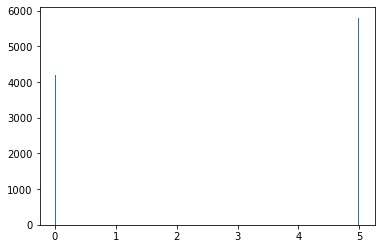

In [28]:

plt.hist(data,bins=300)
plt.show()

In [29]:
for i in range(len(sum_list)):
    sum_list[i]=np.round(sum_list[i]);
print(mi, ma)
print("NN:           ",sum(sum_list)/len(sum_list))

[0.0002] [5.]
NN:            [2.902]


In [30]:
#print("cost-sharing: ",total_delay_cost/test_number_cost);

In [31]:
print("dp:           ",dp[nn][0][divide_number]);

dp:            2.9137684144870253


In [32]:
print(sum(list_payment)/len(list_payment))

[0.8419]


#### 

##### 